In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from cryptography.fernet import Fernet
from skimage.metrics import peak_signal_noise_ratio as psnr, structural_similarity as ssim
import os


🔍 Görsellik Performansı:
PSNR (Cover vs Stego): 37.95 dB
SSIM (Cover vs Stego): 0.9980

📤 Gizli Görsel Kurtarma Performansı:
PSNR (Secret vs Extracted): 29.26 dB
SSIM (Secret vs Extracted): 0.9220


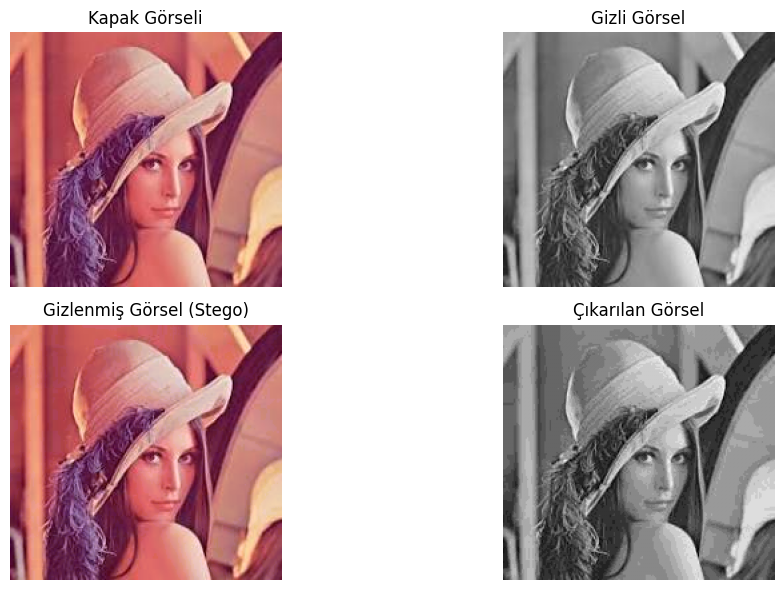

In [1]:
import cv2
import numpy as np
from skimage.metrics import peak_signal_noise_ratio as psnr, structural_similarity as ssim
import matplotlib.pyplot as plt

# Görselleri oku
cover_img = cv2.imread('lena_rgb.jpeg')  # Renkli kapak görseli
secret_img = cv2.imread('lena_grey.jpeg', cv2.IMREAD_GRAYSCALE)  # Gri gizli görsel

# Boyutları eşitle
secret_img = cv2.resize(secret_img, (cover_img.shape[1], cover_img.shape[0]))

# 🔐 LSB'ye gizleme
bits_to_hide = 4
stego_img = cover_img.copy()

# Gizli görselin en anlamlı bitlerini al
secret_bits = secret_img >> (8 - bits_to_hide)  # MSB'yi izole et

# Blue kanalındaki son 2 biti temizle, secret_bits'i ekle
mask = np.uint8(255 - (2**bits_to_hide - 1))  # Örnek: 0b11111100
stego_img[:, :, 0] = (cover_img[:, :, 0] & mask) | secret_bits  # LSB'ye gömme işlemi

# 🕵️‍♂️ Çıkarım (Extracting from LSB)
extracted_bits = (stego_img[:, :, 0] & (2**bits_to_hide - 1)) << (8 - bits_to_hide)
extracted_img = extracted_bits.astype(np.uint8)

# 📊 Performans Ölçümleri
psnr_value = psnr(cover_img, stego_img)
ssim_value = ssim(cv2.cvtColor(cover_img, cv2.COLOR_BGR2GRAY),
                  cv2.cvtColor(stego_img, cv2.COLOR_BGR2GRAY))

recovery_psnr = psnr(secret_img, extracted_img)
recovery_ssim = ssim(secret_img, extracted_img)

# 📢 Sonuçları Yazdır
print("🔍 Görsellik Performansı:")
print(f"PSNR (Cover vs Stego): {psnr_value:.2f} dB")
print(f"SSIM (Cover vs Stego): {ssim_value:.4f}")

print("\n📤 Gizli Görsel Kurtarma Performansı:")
print(f"PSNR (Secret vs Extracted): {recovery_psnr:.2f} dB")
print(f"SSIM (Secret vs Extracted): {recovery_ssim:.4f}")

# 🎨 Görselleri Göster
titles = ['Kapak Görseli', 'Gizli Görsel', 'Gizlenmiş Görsel (Stego)', 'Çıkarılan Görsel']
images = [cv2.cvtColor(cover_img, cv2.COLOR_BGR2RGB), secret_img,
          cv2.cvtColor(stego_img, cv2.COLOR_BGR2RGB), extracted_img]

plt.figure(figsize=(12, 6))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    if i % 2 == 1 or i == 3:
        plt.imshow(images[i], cmap='gray')
    else:
        plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()
